In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

## Import the data

Data source: UCI Machine Learning Repository <br>
[Heart Disease Dataset](https://archive.ics.uci.edu/ml/datasets/heart+disease)

In [5]:
df = pd.read_csv('processed.cleveland.data', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


#### Attribute Information (index 0 to 13 in order):
age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num

In [8]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Identifying Missing Data

In [10]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

In [12]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [13]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

## Dealing with Missing Data

In [19]:
len(df.loc[(df['ca']=='?') | (df['thal']=='?')])

6

In [20]:
df.loc[(df['ca']=='?') | (df['thal']=='?')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [22]:
len(df) # 6 of 303 rows, approximately 2%, contain missing values

303

In [27]:
df_no_missing = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]
len(df_no_missing)

297

In [29]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [30]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

## Split the Data

In [34]:
X = df_no_missing.iloc[:,:-1].copy()
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [35]:
y = df_no_missing['num'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: num, dtype: int64

## One-Hot-Encoding
- __age__, __Float__
- __sex__, __Category__
    - 0 = female
    - 1 = male
- __cp__, chest pain, __Category__
    - 1 = typical angina
    - 2 = atypical angina
    - 3 = non-anginal pain
    - 4 = asymptomatic
- __trestbps__, resting blood pressure (in mm Hg), __Float__
- __chol__, serum cholestoral in mg/dl, __Float__
- __fbs__, fasting blood sugar, __Category__
    - 0 = <= 120 mg/dl 
    - 1 = > 120 mg/dl (1 = true; 0 = false)
- __restecg__, resting electrocardiographic results, __Category__
    - 0 = normal
    - 1 = having ST-T wave abnormality
    - 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
- __thalach__, maximum heart rate achieved, __Float__
- __exang__, exercise induced angina __Category__
    - 0 = no
    - 1 = yes
- __oldpeak__, ST depression induced by exercise relative to rest, __Float__
- __slope__, slope of the peak exercise ST segment, __Category__
    - 1 = upsloping
    - 2 = flat
    - 3 = downsloping
- __ca__, number of major vessels (0-3) colored by flourosopy, __Float__
- __thal__, thalium heart scan, __Category__
    - 3 = normal
    - 6 = fixed defect
    - 7 = reversable defect

In [38]:
X.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
dtype: object

In [40]:
X['cp'].unique()

array([1., 4., 3., 2.])

In [42]:
X['restecg'].unique()

array([2., 0., 1.])

In [43]:
X['slope'].unique()

array([3., 2., 1.])

In [46]:
X['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [48]:
X['sex'].unique()

array([1., 0.])

In [49]:
X['fbs'].unique()

array([1., 0.])

In [50]:
X['exang'].unique()

array([0., 1.])

In [45]:
X_encoded = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'])
X_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [51]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [56]:
y_not_zero_index = y > 0
y[y_not_zero_index] = 1
y.unique()

array([0, 1], dtype=int64)

## Build a Large Classification Tree

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

In [59]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

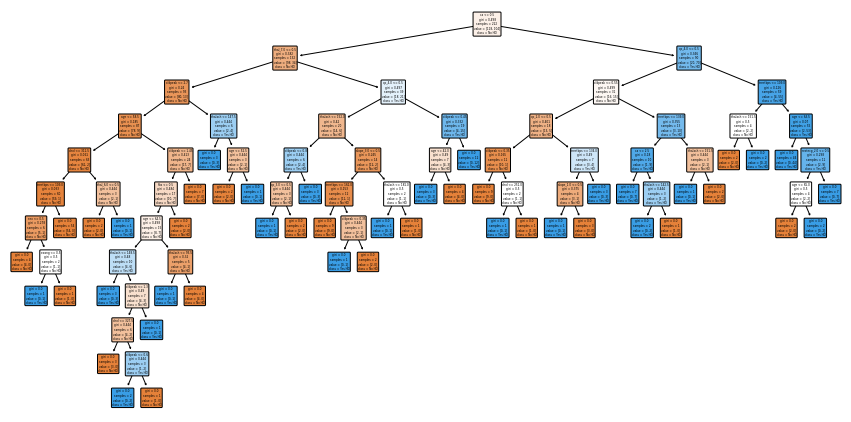

In [61]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, filled=True, rounded=True, class_names=["No HD", "Yes HD"], feature_names=X_encoded.columns);

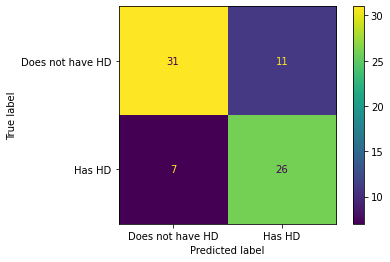

In [63]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Does not have HD", "Has HD"]); #before pruning

In the confusion matrix, we can see that<br>
of 42(31 + 11) people that did not have Heart Disease, __31(73.8%)__ were correctly classified.<br>
of the 33(26+7) people that have Heart Disease, __26(78.8%)__ were correctly classified.

## Cost Complexity Pruning

In [85]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]
ccp_alphas

array([0.        , 0.00295295, 0.003861  , 0.00405405, 0.004095  ,
       0.00429358, 0.00578761, 0.00600601, 0.00600601, 0.00600601,
       0.00600601, 0.0063593 , 0.00667591, 0.00675676, 0.00757375,
       0.00811505, 0.00868726, 0.00889851, 0.01038181, 0.0105777 ,
       0.01422475, 0.01604051, 0.01642461, 0.02103075, 0.03680006,
       0.03934523])

In [65]:
clf_dts = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

In [66]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

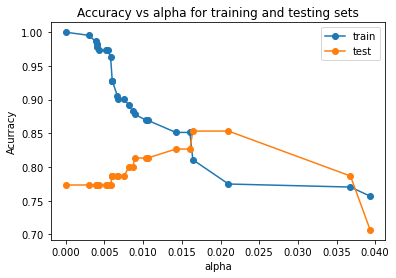

In [76]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label='train')
ax.plot(ccp_alphas, test_scores, marker='o', label='test')
ax.legend()
plt.show()

The accuracy for the testing dataset hits its maximum value when alpha is about 0.016

## Cross Validation

In [82]:
alpha_loop_values = []

In [83]:
for ccp_alpha in ccp_alphas :
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

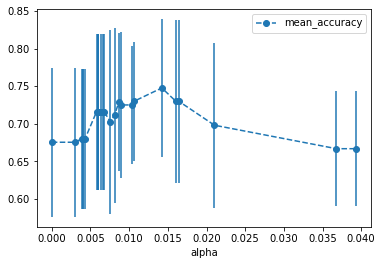

In [84]:
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])
alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--')

Using cross validation, we can see that instead of using ccp_alpha = 0.016, using ccp_alpha = 0.014 might be better

In [87]:
alpha_results[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha'] < 0.017)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395
21,0.016041,0.730000,0.108218
22,0.016425,0.730000,0.108218


In [95]:
ideal_ccp_alpha = alpha_results.loc[20]['alpha']
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

## Final Classification Tree

In [96]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

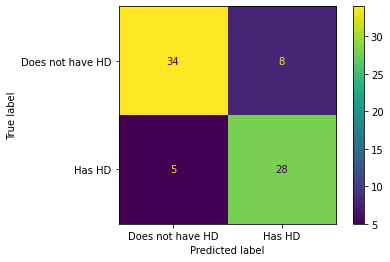

In [101]:
plot_confusion_matrix(clf_dt_pruned, X_test, y_test, display_labels=["Does not have HD", "Has HD"])

In the confusion matrix, we can see that<br>
of 42 people that did not have Heart Disease, 34(80.9%) were correctly classified.<br>
of the 33 people that have Heart Disease, 28(84.8%) were correctly classified.<br><br>
__Pruned tree is better at classifying patients than the full sized tree__

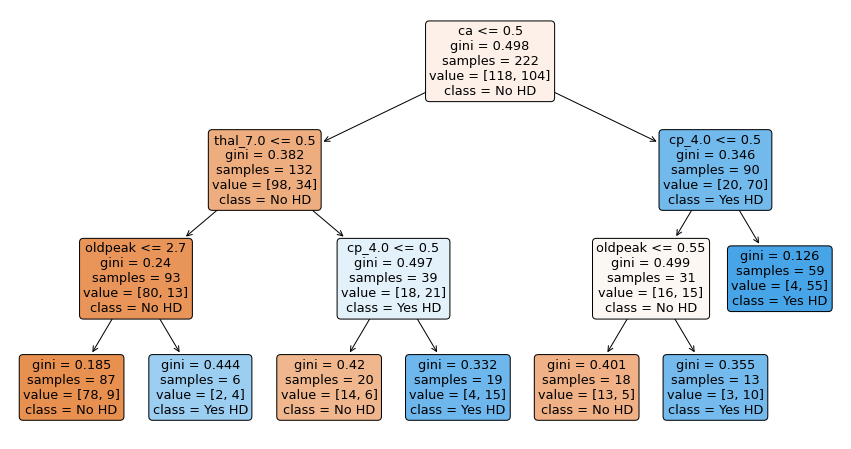

In [116]:
plt.figure(figsize = (15, 8))
plot_tree(clf_dt_pruned, filled=True, rounded=True, class_names=["No HD", "Yes HD"], feature_names=X_encoded.columns);